# **CNN_SVM Model**

## Load the dataset from google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pwd #to know the drive path

Mounted at /content/drive
/content


In [2]:
!unzip drive/My\ Drive/dataset/DeepSeagrass.zip   

Streaming output truncated to the last 5000 lines.
  inflating: DeepSeagrass/Training/Strappy/Image213_Row2_Col2.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image213_Row4_Col1.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image214_Row1_Col5.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image214_Row4_Col5.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row1_Col3.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row2_Col2.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row3_Col6.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row4_Col1.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image215_Row4_Col6.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row1_Col0.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row2_Col2.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row2_Col5.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row3_Col1.jpg  
  inflating: DeepSeagrass/Training/Strappy/Image216_Row3_Col6.jpg

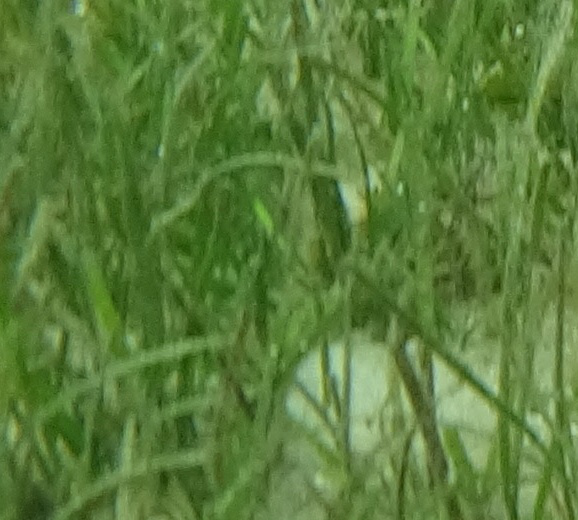

In [ ]:
import tensorflow as tf
tf. __version__
img = tf.keras.preprocessing.image.load_img('DeepSeagrass/Training/Strappy/Image358_Row2_Col2.jpg')
img

In [3]:
#Import necessary libraries
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten, GlobalAveragePooling2D,Dense, Reshape, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2  #to import support vector machine

from matplotlib import pyplot as plt
import numpy as np
from glob import glob

In [19]:
#IMAGE_SIZE = [224, 224]
CLASSES = ["Strappy", "Ferny", "Rounded", "Background"]
CROP_SHAPE=[150,150]
BATCH_SIZE= 32

#train_path = '/content/DeepSeagrass/Training'
#valid_path = '/content/DeepSeagrass/Test'

In [20]:
#Preprocessing training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

train_data= train_datagen.flow_from_directory('/content/DeepSeagrass/Training', 
                                             target_size=CROP_SHAPE,
                                             batch_size=BATCH_SIZE,
                                             shuffle=True,
                                             class_mode='categorical')

Found 42848 images belonging to 4 classes.


In [21]:
#Preprocessing the testing data
test_datagen= ImageDataGenerator(rescale=1./255)

val_data=test_datagen.flow_from_directory('/content/DeepSeagrass/Validate',
                                          target_size=CROP_SHAPE,
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical')

Found 8566 images belonging to 4 classes.


In [22]:
test_data=test_datagen.flow_from_directory('/content/DeepSeagrass/Test',
                                          target_size=CROP_SHAPE,
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical')

Found 13378 images belonging to 4 classes.


In [8]:
class_num = glob('/content/DeepSeagrass/Training/**')
#valid_class = glob('/content/DeepSeagrass/Test/**')

print(class_num)


['/content/DeepSeagrass/Training/Strappy', '/content/DeepSeagrass/Training/Rounded', '/content/DeepSeagrass/Training/Background', '/content/DeepSeagrass/Training/Ferny']


# Step -2: Build the CNN Model


In [9]:
#Initialising the cnn
cnn =Sequential()
#step-1: convolutional layer
cnn.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu', strides= 2, input_shape=CROP_SHAPE+[3]))

#step-2: Pooling layer
cnn.add(MaxPool2D(pool_size= 2, strides= 2))

#Add second conv layer
cnn.add(Conv2D(filters=32, padding='same', kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))

#step-3: Flattening
cnn.add(Flatten())

#step-4: Fully connected layer
cnn.add(Dense(units=128, activation='relu'))

#step-5: output layer as support vector machine
#Finally, after feature extraction from cnn layers label the classes using SVM
cnn.add(Dense(len(class_num), kernel_regularizer= l2(0.02), activation= 'softmax'))

# **Loading pretrained model and tune it with augmented data**

In [15]:
from tensorflow.keras.models import load_model
r1= load_model('/content/drive/MyDrive/dataset/v1_cnnsvm.h5')

In [18]:
r1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 37, 37, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10368)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [23]:
#loaded_model = load_model('inceptionmodelr1.h5')
test_loss, test_acc = r1.evaluate(test_data, verbose=2)
print('The CNN_SVM hybrid model, accuracy: {:5.2f}%'.format(100 * test_acc))
print('The CNN_SVM hybrid model, loss: {:5.2f}%'.format(100 * test_loss))

419/419 - 118s - loss: 0.5752 - accuracy: 0.7184 - 118s/epoch - 281ms/step
The CNN_SVM hybrid model, accuracy: 71.84%
The CNN_SVM hybrid model, loss: 57.52%


In [25]:
test_loss, test_acc = r1.evaluate(val_data, verbose=2)
print('The CNN_SVM hybrid model, accuracy: {:5.2f}%'.format(100 * test_acc))
print('The CNN_SVM hybrid model, loss: {:5.2f}%'.format(100 * test_loss))

268/268 - 74s - loss: 0.1633 - accuracy: 0.9272 - 74s/epoch - 277ms/step
The CNN_SVM hybrid model, accuracy: 92.72%
The CNN_SVM hybrid model, loss: 16.33%


In [26]:
for i, layer in enumerate(r1.layers):
   print(i, layer.name)

0 conv2d
1 max_pooling2d
2 conv2d_1
3 max_pooling2d_1
4 flatten
5 dense
6 dense_1


## Data Augmentation

In [27]:
#Preprocessing training data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.3,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=90,
        brightness_range=[0.2,1.0],
        fill_mode='reflect' #good for natural images else select 'nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [28]:
train_data = train_datagen.flow_from_directory(
        '/content/DeepSeagrass/Training',
        target_size=CROP_SHAPE,
        shuffle=True,
        batch_size=BATCH_SIZE,
        interpolation='nearest',
        class_mode='categorical')

val_data = test_datagen.flow_from_directory(
        '/content/DeepSeagrass/Validate',
        target_size=CROP_SHAPE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 42848 images belonging to 4 classes.
Found 8566 images belonging to 4 classes.


### Tuning the model

In [30]:
#metrics_per_class = ["accuracy", tf.keras.metrics.Precision(class_id=0, name="precision_0"), tf.keras.metrics.Recall(class_id=0, name="recall_0"),
       # tf.keras.metrics.Precision(class_id=1, name="precision_1"), tf.keras.metrics.Recall(class_id=1, name="recall_1"),
        #tf.keras.metrics.Precision(class_id=2, name="precision_2"), tf.keras.metrics.Recall(class_id=2, name="recall_2"),
        #tf.keras.metrics.Precision(class_id=3, name="precision_3"), tf.keras.metrics.Recall(class_id=3, name="recall_3")]

from tensorflow.keras.optimizers import SGD

r1.compile(
    optimizer = SGD(learning_rate=1e-4, momentum=0.9), 
    loss = 'CategoricalHinge', 
    metrics=['accuracy']
)

In [32]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, TensorBoard
import tensorflow as tf
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
es = tf.keras.callbacks.EarlyStopping(patience=6)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            #verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

In [33]:
r2 = r1.fit(
        x=train_data,
        validation_data=val_data,
        epochs=50,
        callbacks=[tensorboard_callback,learning_rate_reduction],
        steps_per_epoch=len(train_data) //BATCH_SIZE,
        validation_steps=len(val_data) //BATCH_SIZE  
)

Epoch 1/50
41/41 [==============================] - 31s 746ms/step - loss: 0.7186 - accuracy: 0.6387 - val_loss: 0.3675 - val_accuracy: 0.8203 - lr: 1.0000e-04
Epoch 2/50
41/41 [==============================] - 31s 761ms/step - loss: 0.5151 - accuracy: 0.7569 - val_loss: 0.4773 - val_accuracy: 0.7773 - lr: 1.0000e-04
Epoch 3/50
41/41 [==============================] - 31s 763ms/step - loss: 0.5012 - accuracy: 0.7614 - val_loss: 0.4904 - val_accuracy: 0.7539 - lr: 1.0000e-04
Epoch 4/50
41/41 [==============================] - 29s 714ms/step - loss: 0.4727 - accuracy: 0.7774 - val_loss: 0.4309 - val_accuracy: 0.7930 - lr: 1.0000e-04
Epoch 5/50
41/41 [==============================] - 32s 765ms/step - loss: 0.4283 - accuracy: 0.8026 - val_loss: 0.4737 - val_accuracy: 0.7656 - lr: 5.0000e-05
Epoch 6/50
41/41 [==============================] - 33s 799ms/step - loss: 0.4463 - accuracy: 0.7950 - val_loss: 0.4940 - val_accuracy: 0.7578 - lr: 5.0000e-05
Epoch 7/50
41/41 [======================

In [36]:
test_loss, test_acc = r1.evaluate(val_data, verbose=2)
print('The CNN_SVM hybrid model, accuracy: {:5.2f}%'.format(100 * test_acc))
print('The CNN_SVM hybrid model, loss: {:5.2f}%'.format(100 * test_loss))

268/268 - 66s - loss: 0.4089 - accuracy: 0.8028 - 66s/epoch - 247ms/step
The CNN_SVM hybrid model, accuracy: 80.28%
The CNN_SVM hybrid model, loss: 40.89%


In [40]:
test_loss, test_acc = r1.evaluate(test_data, verbose=2)
print('The CNN_SVM hybrid model, accuracy: {:5.2f}%'.format(100 * test_acc))
print('The CNN_SVM hybrid model, loss: {:5.2f}%'.format(100 * test_loss))

419/419 - 115s - loss: 0.5766 - accuracy: 0.7145 - 115s/epoch - 275ms/step
The CNN_SVM hybrid model, accuracy: 71.45%
The CNN_SVM hybrid model, loss: 57.66%


In [37]:
cnn.save("r2_tunedcnnsvm.h5")

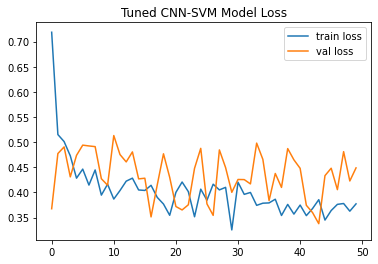

<Figure size 432x288 with 0 Axes>

In [38]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='train loss')
plt.plot(r2.history['val_loss'], label='val loss')
plt.legend()
plt.title('Tuned CNN-SVM Model Loss')
plt.show()
plt.savefig('r2_svmLossVal_loss')

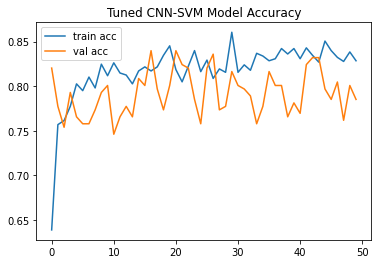

<Figure size 432x288 with 0 Axes>

In [39]:
# plot the accuracy
plt.plot(r2.history['accuracy'], label='train acc')
plt.plot(r2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Tuned CNN-SVM Model Accuracy')
plt.show()
plt.savefig('r2_svmAccVal_acc')